In [ ]:
import numpy
import pandas as pd
import requests
from bs4 import BeautifulSoup as bu

n_pages =2046
Time_Date = list()
Title = list()
Wrote = list()
Link = list()


for n in range(1, n_pages + 1):
  print(n)
  url = "https://www.mako.co.il/news-military?page=" + str(n)
  response = requests.get(url)
  soup = bu(response.content, "html.parser")
  print(response)
  print(soup)
  uls = soup("ul", attrs={"class": "more-items"})

  for ul in uls:
    for li in ul.findAll('li'):
      ah = li.p.a
      Title.append(ah.text.replace("\n", " "))
      Link.append("mako.co.il" + ah.attrs["href"])
      spn = li.find_all("span")
      try:
        Wrote.append(spn[0].text.replace("\n", " "))
      except IndexError:
        Wrote.append(numpy.NaN)
      try:
        Time_Date.append(spn[1].text)
      except IndexError:
        Time_Date.append(numpy.NaN)
  print(len(Time_Date), ",", len(Title), ",", len(Wrote), ",", len(Link))

df = pd.DataFrame({"Time_Date": Time_Date, "Title": Title, "Wrote": Wrote, "Link": Link})
# df.to_csv('N12-Crawling.csv')




N12-Data-Processing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36807 entries, 0 to 36806
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  36807 non-null  int64 
 1   Time_Date   36638 non-null  object
 2   Title       36805 non-null  object
 3   Wrote       36807 non-null  object
 4   Link        36807 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.4+ MB
None


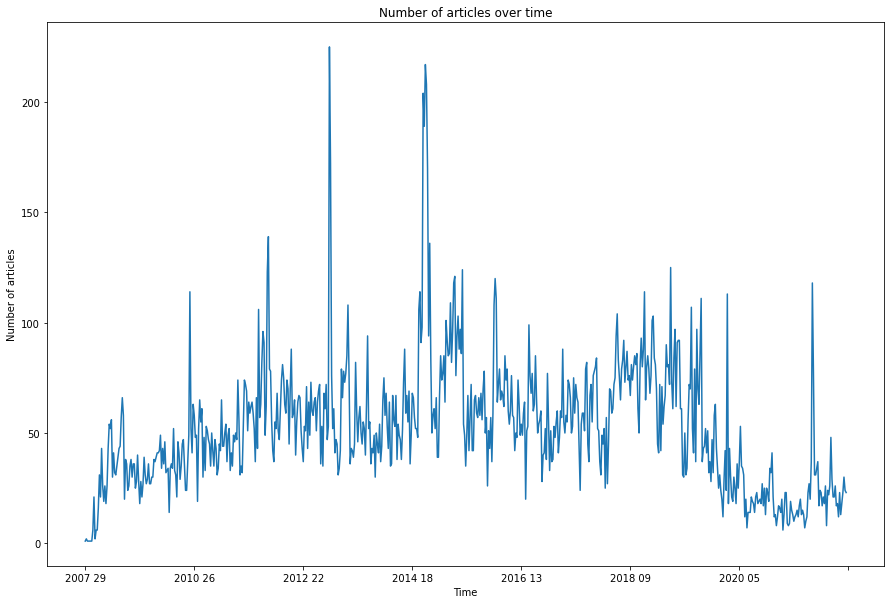

In [26]:
import pandas as pd
import matplotlib as plt


df = pd.read_csv('/Users/na/PycharmProj/Python_Project_Done/N12-Crawling.csv', lineterminator='\n').copy()
print(df.info())
df['Date'] = pd.to_datetime(df['Time_Date'], dayfirst=True)
df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Week_Year'] = df['Date'].dt.strftime("%G %V")
df.sort_values(by = ['Date'], inplace = True)

Monthdf = df['Week_Year'].value_counts(sort=False)
Monthdf.sort_index(inplace=True)
Monthdf.plot(kind='line', figsize=(15, 10), title="Number of articles over time", xlabel="Time", ylabel="Number of articles")

df.drop(df.index[df['Year'] <= 2010], inplace=True)
df.dropna(subset = ['Year'], inplace=True)

df.to_csv('N12_DaPro.csv')

N12_Selenium_Article_Info

In [ ]:
import numpy
import pandas as pd
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException
from selenium import webdriver

Num_Views = list()
Num_Comments = list()
TypeNews = list()
DateUpload = list()


df = pd.read_csv("/Users/na/PycharmProj/Python_Project_Done/N12_DaPro.csv", lineterminator='\n').copy()
driver = webdriver.Chrome(r"/Users/na/PycharmProj/PythonProject/venv/bin/chromedriver")
for i in df['Link']:
    driver.get("https://www." + i)
    try:
        Views = WebDriverWait(driver, 5).until(
        EC.visibility_of_element_located((By.XPATH, '//*[@id="article-wrap"]/article/section[1]/ul/li[1]/span'))).get_attribute("innerHTML")
        Num_Views.append(Views)
        print(Views)
    except TimeoutException:
        print("Num_Views = Nan")
        Num_Views.append(numpy.NaN)

    try:
        Comments = WebDriverWait(driver, 5).until(
        EC.visibility_of_element_located((By.XPATH, '//*[@id="article-wrap"]/article/section[1]/ul/li[3]/a/span'))).get_attribute("innerHTML")
        Num_Comments.append(Comments)
        print(Comments)
    except TimeoutException:
        print("Comments = NaN")
        Num_Comments.append(numpy.NaN)

    try:
        TypeN = WebDriverWait(driver, 5).until(
        EC.visibility_of_element_located((By.CSS_SELECTOR, '#article-wrap > article > nav > span > ul > li.here > a > span'))).get_attribute("innerHTML")
        TypeNews.append(TypeN)
        print(TypeN)
    except TimeoutException:
        print("Tyape = NaN")
        TypeNews.append(numpy.NaN)

    try:
        DateTimeUp = WebDriverWait(driver, 5).until(
        EC.visibility_of_element_located((By.CLASS_NAME, 'display-date'))).get_attribute("innerHTML")
        DateUpload.append(DateTimeUp.replace("</span>&nbsp;", "").replace("</span><span>", ""))
        print(DateTimeUp.replace("</span>&nbsp;", "").replace("</span><span>", ""))
    except TimeoutException:
        print("Date_up = NaN")
        DateUpload.append(numpy.NaN)

    df2 = pd.DataFrame({"Num_Views": Num_Views, "Num_Comments": Num_Comments, "Type_Of_New": TypeNews, "Date_Upload": DateUpload})
    df2.to_csv("Full_Info_Of_Each_New.csv")



TA-125_Selenium

In [ ]:
import pandas as pd
import time
import sys
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

driver = webdriver.Chrome(r"/content/drive/MyDrive/ProjectsPython/chromedriver")
driver.get("https://il.investing.com/indices/ta100-historical-data")
WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.ID, 'data_interval'))).click()
WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.ID, 'widgetFieldDateRange'))).click()
date = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.ID, 'startDate')))
date.clear()
date.send_keys("01/01/2011",Keys.ENTER)
time.sleep(3)
df_TA125 = pd.read_html(driver.page_source)[0]

time.sleep(3)
# df_TA125.to_csv('TA-125.csv')

ILS_Values_Selenium

In [ ]:
import pandas as pd
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait

driver = webdriver.Chrome(r"/Users/na/PycharmProj/PythonProject/venv/bin/chromedriver")

driver.get("https://il.investing.com/currencies/usd-ils-historical-data")
WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.ID, 'widgetFieldDateRange'))).click()
date = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.ID, 'startDate')))
date.clear()
date.send_keys("01/01/2011",Keys.ENTER)
time.sleep(3)
df_us = pd.read_html(driver.page_source)[0]

time.sleep(3)
# df_us.to_csv('ILS-USD.csv')

ILS-Data-Processing

In [3]:
import pandas as pd

USD_df = pd.read_csv('/Users/na/PycharmProj/Python_Project_Done/ILS-USD.csv', lineterminator='\n').copy()
USD_df = USD_df.rename({'תאריך': 'Date', 'שער': 'Rate', 'פתיחה':'Open', 'גבוה':'High', 'נמוך':'Low', 'שינוי %':'Change %'}, axis=1).copy()

USD_df.drop(columns=['Unnamed: 0'], inplace=True)
USD_df['Date'] = pd.to_datetime(USD_df['Date'], dayfirst=True)
USD_df['Year'] = pd.DatetimeIndex(USD_df['Date']).year
USD_df['Week_Year'] = USD_df['Date'].dt.strftime("%G %V")
USD_df.set_index('Date', inplace=True)
USD_df['Change %'] = USD_df['Change %'].str.rstrip('%').astype('float')
USD_df.drop(USD_df.index[USD_df['Year'] <= 2010], inplace=True)


USD_df.to_csv('USD_DaPro.csv')

EDA - USD rate

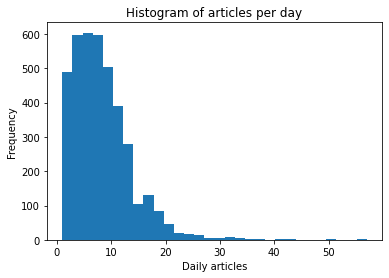

count    3913.000000
mean        8.223102
std         5.555222
min         1.000000
25%         4.000000
50%         7.000000
75%        11.000000
max        57.000000
Name: Daily articles, dtype: float64
Average ILS/USD rate:
-0.0035376044568245124


/var/folders/j8/8xnv0_z11dd67zpwg1bswhgc0000gn/T/ipykernel_31061/3427926363.py:32: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


TypeError: '<' not supported between instances of 'str' and 'int'

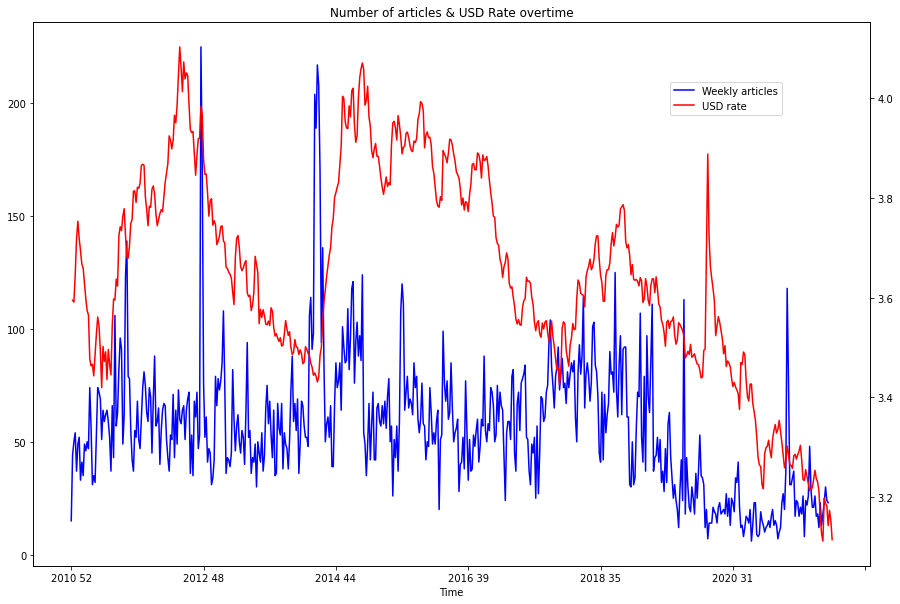

In [4]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

N12_df = pd.read_csv('/Users/na/PycharmProj/Python_Project_Done/N12_DaPro.csv', lineterminator='\n').copy()

N12_daily = N12_df['Date'].value_counts(sort=False).rename("Daily articles").copy()
N12_daily.sort_index(inplace=True)
plt.hist(N12_daily, bins=30)
plt.figsize=(20, 15)
plt.title("Histogram of articles per day")
plt.xlabel("Daily articles")
plt.ylabel("Frequency")
plt.show()
print (N12_daily.describe())

N12_weekly = N12_df['Week_Year'].value_counts(sort=False).rename("Weekly articles").copy()


USD_df = pd.read_csv('/Users/na/PycharmProj/Python_Project_Done/USD_DaPro.csv', lineterminator='\n').copy()

USD_week = USD_df.groupby(['Week_Year']).max().copy()
USD_week = pd.concat([USD_week, USD_week['Rate'].pct_change().rename("Interweek change").shift(periods=-1)], axis=1).copy()

Weekly_unified_df = pd.concat([USD_week, N12_weekly], axis=1).sort_index()
fig, ax = plt.subplots()
Weekly_unified_df['Weekly articles'].plot(ax=ax, style='b-', figsize=(15, 10), title="Number of articles & USD Rate overtime", xlabel="Time")
Weekly_unified_df['High'].plot(ax=ax, style='r-', secondary_y=True)
ax.legend([ax.get_lines()[0], ax.right_ax.get_lines()[0]],\
           ['Weekly articles','USD rate'], bbox_to_anchor=(0.9, 0.9))
fig.show()

print("Average ILS/USD rate:")
print(USD_df['Change %'].mean())

unified_df = pd.concat([USD_df, N12_daily], axis=1).sort_index().copy()
unified_df.to_csv("alldataframe.csv")

BigArticlesTLV_df = unified_df[unified_df['Daily articles'] >= 20]
print ("Average TLV 125 change at Insecure Time:")
print(BigArticlesTLV_df.mean())

EDA - TLV 125 rate

Average TLV 125 change: 
0.02334819769602378
Average TLV 125 change at Insecure Time: 
-0.03481818181818182
Average TLV 125 change 1 day after Insecure Time: 
0.07290909090909091
Average TLV 125 change 2 days after Insecure Time: 
0.06663636363636362
Average TLV 125 change 3 days after Insecure Time: 
-0.0012727272727272678


/var/folders/j8/8xnv0_z11dd67zpwg1bswhgc0000gn/T/ipykernel_31061/2706006262.py:23: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(TA125_df.mean()['Change %'])
/var/folders/j8/8xnv0_z11dd67zpwg1bswhgc0000gn/T/ipykernel_31061/2706006262.py:34: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(BigArticlesTLV_df.mean()['Change %'])
/var/folders/j8/8xnv0_z11dd67zpwg1bswhgc0000gn/T/ipykernel_31061/2706006262.py:41: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(BigArticlesTLV_df.

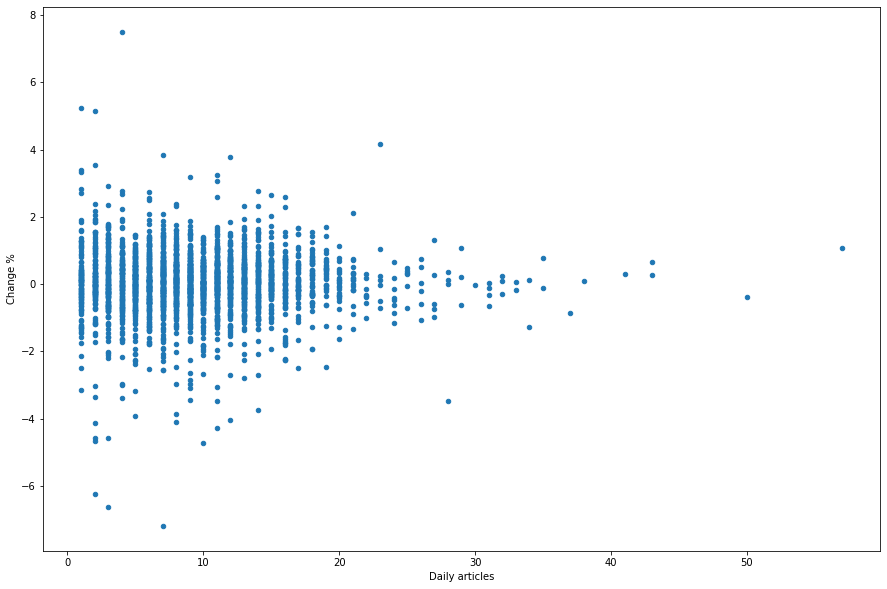

In [8]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

N12_df = pd.read_csv('/Users/na/PycharmProj/Python_Project_Done/N12_DaPro.csv', lineterminator='\n').copy()
N12_df['Date'] = pd.to_datetime(N12_df['Time_Date'], dayfirst=True)
N12_df['Week_Year'] = N12_df['Date'].dt.strftime("%G %V")

N12_daily = N12_df['Date'].value_counts(sort=False).rename("Daily articles")
N12_daily.sort_index(inplace=True)


TA125_df = pd.read_csv('/Users/na/PycharmProj/Python_Project_Done/TA-125DaPr.csv', lineterminator='\n').copy()

TA125_df['Date'] = pd.to_datetime(TA125_df['Date'], dayfirst=True)
# TA125_df['Week_Year'] = TA125_df['Date'].dt.strftime("%G %V")
TA125_df.set_index('Date', inplace=True)
TA125_df['Change %'] = TA125_df['Change %'].str.rstrip('%').astype('float')
TA125_df.sort_index(inplace=True)

print ("Average TLV 125 change: ")
print(TA125_df.mean()['Change %'])

unified_df = pd.concat([TA125_df, N12_daily], axis=1).sort_index()
unified_df.plot.scatter (x='Daily articles', y='Change %', figsize=(15, 10))

# unified_df['Change %'].fillna(method="bfill", inplace=True)
# print ("Average TLV 125 change with fillna:")
# print(unified_df.mean()['Change %'])

BigArticlesTLV_df = unified_df[unified_df['Daily articles'] >= 20]
print ("Average TLV 125 change at Insecure Time: ")
print(BigArticlesTLV_df.mean()['Change %'])

# 1 day shift:
TA125_df['Change %'] = TA125_df['Change %'].shift(1)
unified_df = pd.concat([TA125_df, N12_daily], axis=1).sort_index()
BigArticlesTLV_df = unified_df[unified_df['Daily articles'] >= 20]
print ("Average TLV 125 change 1 day after Insecure Time: ")
print(BigArticlesTLV_df.mean()['Change %'])

# 2 days shift:
TA125_df['Change %'] = TA125_df['Change %'].shift(1)
unified_df = pd.concat([TA125_df, N12_daily], axis=1).sort_index()
BigArticlesTLV_df = unified_df[unified_df['Daily articles'] >= 20]
print ("Average TLV 125 change 2 days after Insecure Time: ")
print(BigArticlesTLV_df.mean()['Change %'])

# 3 days shift:
TA125_df['Change %'] = TA125_df['Change %'].shift(1)
unified_df = pd.concat([TA125_df, N12_daily], axis=1).sort_index()
BigArticlesTLV_df = unified_df[unified_df['Daily articles'] >= 20]
print ("Average TLV 125 change 3 days after Insecure Time: ")
print(BigArticlesTLV_df.mean()['Change %'])

N12 Text Analysis

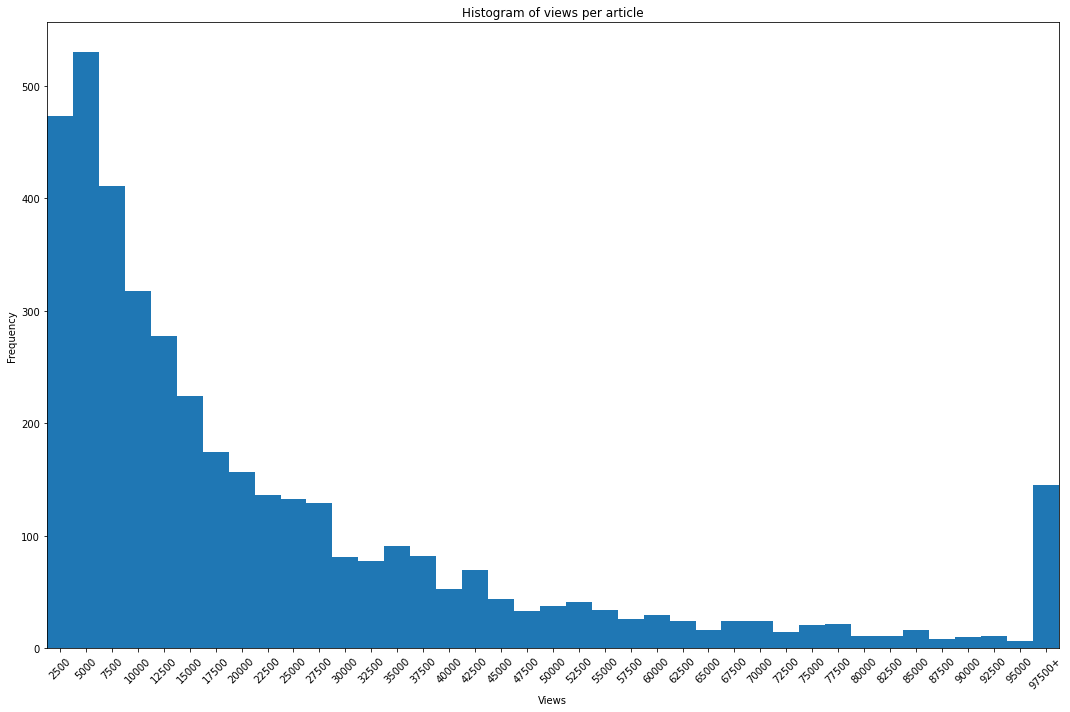

0.12 of the articles have more than 50000 views

0.09 of the articles have less than 2000 views


Word cloud of popular titles:


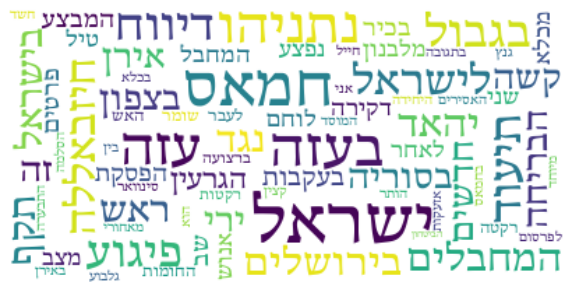


Word cloud of unpopular titles:


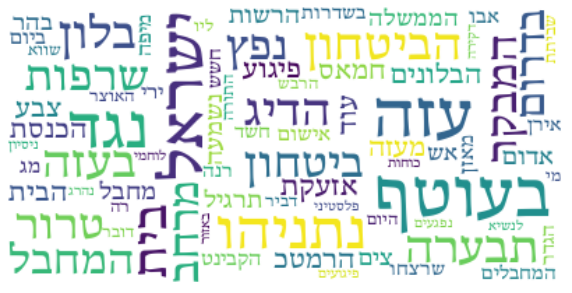


Accurancy of predicting successful titles is 86.62%


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
# from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier

from wordcloud import WordCloud

# Plot histogram with overflow bin
def plot_histogram (data):
  bins = np.arange(0, 100000, 2500)
  fig, ax = plt.subplots(figsize=(9, 5))
  plt.hist([np.clip(data, bins[0], bins[-1])],
                                  bins=bins)

  xlabels = bins[1:].astype(str)
  xlabels[-1] += '+'
  N_labels = len(xlabels)
  plt.xlim([0, 97500])
  plt.xticks(2500 * np.arange(N_labels) + 1250)
  ax.set_xticklabels(xlabels, rotation = 45)

  plt.title("Histogram of views per article")
  plt.xlabel("Views")
  plt.ylabel("Frequency")
  plt.gcf().set_size_inches(15, 10)
  fig.tight_layout()
  plt.show()

# List the top n words in a vocabulary according to occurrence in a text corpus.
def plot_wordcloud (corpus, n=None, stop_words = []):
    vectorizer = CountVectorizer(stop_words=stop_words)
    bag_of_words = vectorizer.fit_transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = dict([(word[::-1], sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()])

    wordcloud = WordCloud(max_font_size=50, max_words=75, background_color="white", font_path='/Users/na/PycharmProj/Python_Project_Done/HADASAH.TTF'). \
         generate_from_frequencies(words_freq)
    plt.figure(figsize=(10,7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

    # Return n most common words
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

# Read article titles and views dataframes
N12_info = pd.read_csv('/Users/na/PycharmProj/Python_Project_Done/N12_article_info.csv', lineterminator='\n', index_col='Ind', thousands=',').copy()
N12_info.dropna(subset=['Num_Views'], inplace=True)
N12_info['Num_Views'] = N12_info['Num_Views'].astype('int')

N12_df = pd.read_csv('/Users/na/PycharmProj/Python_Project_Done/N12_DaPro.csv', lineterminator='\n', index_col='Unnamed: 0').copy()
N12_df['Date'] = pd.to_datetime(N12_df['Time_Date'], dayfirst=True)
N12_df['Title'] = N12_df['Title'].astype('U')    # Needed for CountVectorizer
N12_df.rename({'Unnamed: 0': 'Ind'})
N12_df.drop(columns=['Unnamed: 0.1'], inplace=True)

# Merge the 2 dataframes and extract recent_num recent articles from it
RECENT_NUM = 4030
N12_recent = pd.concat([N12_df, N12_info], axis=1, join="inner").sort_index().head(RECENT_NUM)

# print (N12_recent.describe())
plot_histogram(N12_recent['Num_Views'])

POPULAR_ARTICLE_THRESHOLD = 50000
UNPOPULAR_ARTICLE_THRESHOLD = 2000
print ("{0:3.2f} of the articles have more than {1:} views\n".format(
       N12_recent[N12_recent['Num_Views']>POPULAR_ARTICLE_THRESHOLD]['Num_Views'].count()/
       N12_recent['Num_Views'].count(), POPULAR_ARTICLE_THRESHOLD))

print ("{0:3.2f} of the articles have less than {1:} views\n".format(
       N12_recent[N12_recent['Num_Views']<UNPOPULAR_ARTICLE_THRESHOLD]['Num_Views'].count()/
       N12_recent['Num_Views'].count(), UNPOPULAR_ARTICLE_THRESHOLD))

N12_recent ['Popular'] = N12_recent['Num_Views']>POPULAR_ARTICLE_THRESHOLD


# Divide to train and tst sets

N12_recent["id"]=N12_recent.index
N12_train=N12_recent[N12_recent["id"]%5!=0]
N12_test=N12_recent[N12_recent["id"]%5==0]


# EDA - Word Cloud - Help fnd Hebrew stop words

stop_words = [x.strip() for x in open('/Users/na/PycharmProj/Python_Project_Done/stopwords.txt','r').read().split('\n')]

print ("\nWord cloud of popular titles:")
common_words = plot_wordcloud(N12_recent[N12_recent['Num_Views']>POPULAR_ARTICLE_THRESHOLD].Title, 20, stop_words)
print ("\nWord cloud of unpopular titles:")
common_words = plot_wordcloud(N12_recent[N12_recent['Num_Views']<UNPOPULAR_ARTICLE_THRESHOLD].Title, 20, stop_words)

# Verify stop words work!
# print ('בבקשה: ', count_vect.vocabulary_.get('בבקשה'))
# print ('לא: ', count_vect.vocabulary_.get('לא'))

# Text classification analysis - without pipelines
# count_vect = CountVectorizer(stop_words = stop_words) # ,max_features=4000)
# X_train_counts = count_vect.fit_transform(N12_recent.Title)
# X_train_counts.shape   # (4030, 8399)
# X_normalized = preprocessing.normalize(X_train_counts, norm='l1')
# clf = MultinomialNB().fit(X_normalized, N12_recent.Popular)
# predicted = clf.predict(X_normalized)
# np.mean(predicted == N12_recent.Popular)

# Text classification analysis - with pipelines

text_clf_nb = Pipeline([
    ('vect', CountVectorizer(stop_words=stop_words,max_features=1000)), # ,max_features=10000)),
    ('norm', preprocessing.Normalizer(norm='l1')),
    ('clf', MultinomialNB()),
    # ('clf', SGDClassifier(loss='hinge', penalty='l2',
    #                       alpha=1e-3, random_state=42,
    #                       max_iter=5, tol=None)),
])

text_clf_nb.fit(N12_train.Title, N12_train.Popular)
predicted = text_clf_nb.predict(N12_test.Title)
print ("\nAccurancy of predicting successful titles is {0:3.2f}%".format(
    np.mean(predicted == N12_test.Popular)*100))
